# Q1: Simple CNN network for PASCAL multi-label classification (20 points)
Now let’s try to recognize some natural images. We provided some starter code for this task. The following steps will guide you through the process.


## 1.1 Setup the dataset
We start by modifying the code to read images from the PASCAL 2007 dataset. The important thing to note is that PASCAL can have multiple objects present in the same image. Hence, this is a multi-label classification problem, and will have to be tackled slightly differently.


First, download the data. `cd` to a location where you can store 0.5GB of images. Then run:
```
wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
tar -xf VOCtrainval_06-Nov-2007.tar

wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar
tar -xf VOCtest_06-Nov-2007.tar
cd VOCdevkit/VOC2007/
```

## 1.2 Write a dataloader with data augmentation (5 pts)
**Dataloader** The first step is to write a [pytorch data loader](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html) which loads this PASCAL data. Complete the functions `preload_anno` and `__getitem__` in `voc_dataset.py`. 
* **Hint**: Refer to the `README` in `VOCdevkit` to understand the structure and labeling.
* **Hint** : As the function docstring says, `__getitem__` takes as input the index, and returns a tuple - `(image, label, weight)`. The labels should be 1s for each object that is present in the image, and weights should be 1 for each label in the image, except those labeled as ambiguous (use the `difficult` attribute). All other values should be 0. For simplicity, resize all images to a canonical size.)


**Data Augmentation** Modify `__getitem__` to randomly *augment* each datapoint. Please describe what data augmentation you implement.
* **Hint**: Since we are training a model from scratch on this small dataset, it is important to perform basic data augmentation to avoid overfitting. Add random crops and left-right flips when training, and do a center crop when testing, etc. As for natural images, another common practice is to subtract the mean values of RGB images from ImageNet dataset. The mean values for RGB images are: `[123.68, 116.78, 103.94]` – sometimes, rescaling to `[−1, 1]` suffices.

**Note:** You should use data in ‘trainval’ for training and ‘test’ for testing, since PASCAL is a small dataset.


### DESCRIBE YOUR AUGMENTATION PIPELINE HERE**
**Train Augmentations:**

For train augmentations, I first use RandomResizedCrop to randomly scale the image and crop it, and then resize it to our desired size.
Then, I filped the image randomly.
Then, I transformed the image to tensor.
Finally, I used the mean and std information from ImageNet to normalize the image tensor.

<br>

**Test Augmentations:**

For test augmentations, I first resized the image width and height to 1.05 times of our desired size.
Then, I used center crop to crop out the center part of the image of our desired size.
Then, I transformed the image to tensor.
Finally, I used the mean and std information from ImageNet to normalize the image tensor.


## 1.3 Measure Performance (5 pts)
To evaluate the trained model, we will use a standard metric for multi-label evaluation - [mean average precision (mAP)](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html). Please implement `eval_dataset_map` in `utils.py` - this function will evaluate a model's map score using a given dataset object. You will need to make predictions on the given dataset with the model and call `compute_ap` to get average precision.


Please describe how to compute AP for each class(not mAP).
**YOUR ANSWER HERE**

One way to compute AP is to first compute the precision and recall for each class.
Then, for each class, we can plot the precision recall curve.
Finally, we can compute the area under the precision recall curve as AP.


## 1.4 Let's Start Training! (5 pts)
Write the code for training and testing for multi-label classification in `trainer.py`. To start, you'll use the same model you used for Fashion MNIST (bad idea, but let’s give it a shot).

Initialize a fresh model and optimizer. Then run your training code for 5 epochs and print the mAP on test set.

In [1]:
import torch
import trainer
from utils import ARGS
from simple_cnn import SimpleCNN
from voc_dataset import VOCDataset

# create hyperparameter argument class
args = ARGS(epochs=5, use_cuda=True)
print(args)

args.batch_size = 64
args.device = cuda
args.epochs = 5
args.gamma = 0.7
args.log_every = 100
args.lr = 1.0
args.save_at_end = False
args.save_freq = -1
args.test_batch_size = 1000
args.val_every = 100



In [2]:
# initializes (your) naiive model
model = SimpleCNN(num_classes=len(VOCDataset.CLASS_NAMES), inp_size=64, c_dim=3)
# initializes Adam optimizer and simple StepLR scheduler
optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=args.gamma)
# trains model using your training code and reports test map
test_ap, test_map = trainer.train(args, model, optimizer, scheduler)
print('test map:', test_map)

Train Epoch: 0 [0 (0%)]	Loss: 0.698940
test map (validation): 0.06304451297885003
Train Epoch: 1 [100 (27%)]	Loss: 0.241858
test map (validation): 0.06304451297885003
Train Epoch: 2 [200 (53%)]	Loss: 0.254361
test map (validation): 0.06304451297885003
Train Epoch: 3 [300 (80%)]	Loss: 0.247762
test map (validation): 0.06304451297885003
test map: 0.06304451297885003


[TensorBoard](https://www.tensorflow.org/guide/summaries_and_tensorboard) is an awesome visualization tool. It was firstly integrated in [TensorFlow](https://www.tensorflow.org/) (~possibly the only useful tool TensorFlow provides~). It can be used to visualize training losses, network weights and other parameters.

To use TensorBoard in Pytorch, there are two options: [TensorBoard in Pytorch](https://pytorch.org/docs/stable/tensorboard.html) (for Pytorch >= 1.1.0) or [TensorBoardX](https://github.com/lanpa/tensorboardX) - a third party library. Add code in `trainer.py` to visualize the testing MAP and training loss in Tensorboard. *You may have to reload the kernel for these changes to take effect*

Show clear screenshots of the learning curves of testing MAP and training loss for 5 epochs (batch size=20, learning rate=0.001). Please evaluate your model to calculate the MAP on the testing dataset every 100 iterations.

In [3]:
args = ARGS(epochs=5, batch_size=20, lr=0.001, use_cuda=True, gamma=0.7)
model = SimpleCNN(num_classes=len(VOCDataset.CLASS_NAMES), inp_size=64, c_dim=3)
optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=args.gamma)
test_ap, test_map = trainer.train(args, model, optimizer, scheduler)
print('test map:', test_map)

Train Epoch: 0 [0 (0%)]	Loss: 0.688126
test map (validation): 0.06848793717607542
Train Epoch: 0 [100 (40%)]	Loss: 0.243655
test map (validation): 0.12235175558534847
Train Epoch: 0 [200 (80%)]	Loss: 0.244782
test map (validation): 0.14538727048111316
Train Epoch: 1 [300 (20%)]	Loss: 0.247650
test map (validation): 0.15570737815700825
Train Epoch: 1 [400 (59%)]	Loss: 0.254594
test map (validation): 0.1819426870387927
Train Epoch: 1 [500 (99%)]	Loss: 0.233357
test map (validation): 0.1811027064544803
Train Epoch: 2 [600 (39%)]	Loss: 0.250921
test map (validation): 0.2000185282989106
Train Epoch: 2 [700 (79%)]	Loss: 0.196884
test map (validation): 0.19796246650691995
Train Epoch: 3 [800 (19%)]	Loss: 0.210737
test map (validation): 0.2149599569886854
Train Epoch: 3 [900 (59%)]	Loss: 0.222247
test map (validation): 0.21353854036398764
Train Epoch: 3 [1000 (98%)]	Loss: 0.202654
test map (validation): 0.20947277073477472
Train Epoch: 4 [1100 (38%)]	Loss: 0.198952
test map (validation): 0.221

**INSERT YOUR TENSORBOARD SCREENSHOTS HERE**

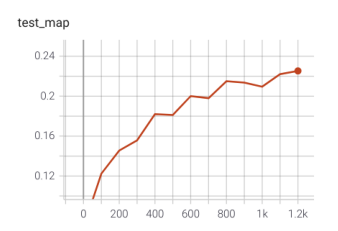

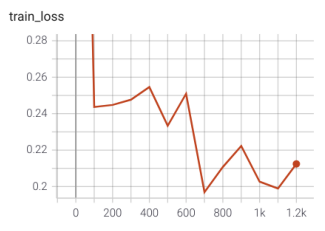

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('q1_1.png')
plt.imshow(img)
plt.axis("off")
plt.show()
img = mpimg.imread('q1_2.png')
plt.imshow(img)
plt.axis("off")
plt.show()